<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>December 8 to 11, 2018: permutations, cycles and derangements
<br>December 3 and 4, 2018: types definitions, OGFs
</small>
</div>
</p>
<br>
<div align="center">
<b>Abstract</b><br>
In this document we collect a naive <i>type system</i> based on sets.
</div>

In [1]:
from itertools import repeat
from sympy import *
#from type_system import *

In [2]:
%run ../../src/commons.py

In [3]:
%run ./type-system.py

---

In [4]:
init_printing()

In [5]:
x,y,m,n,t,z = symbols('x y m n t z', commutative=True)
alpha, beta, gamma, eta = symbols(r'\alpha \beta \gamma \eta', commutative=True)
f,g = Function('f'), Function('g')

# Non-commutative symbols

In [6]:
define(f(z), 1/(1-alpha*z), ctor=FEq).series(z,n=10)

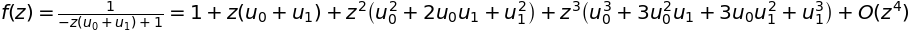

In [7]:
define(f(z), 1/(1-(u[0]+u[1])*z), ctor=FEq).series(z,n=4)

In [8]:
define(f(z), 1/(1-(o[0]+o[1])*z), ctor=FEq).series(z,n=4)

# Exponential gf recap

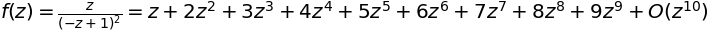

In [9]:
define(f(z), z*(1/(1-z))*(1/(1-z)), ctor=FEq).series(z,n=10)

In [10]:
define(f(z), z**3,ctor=FEq).series(z, n=10, kernel='exponential')

In [11]:
define(f(z), exp(z),ctor=FEq).series(z, n=10, kernel='exponential')

In [11]:
define(f(z), z*exp(z), ctor=FEq).series(z, n=10, kernel='exponential')

In [13]:
define(f(z), z**2*exp(z)/factorial(2,evaluate=False), 
       ctor=FEq).series(z, n=10, kernel='exponential')

In [14]:
define(f(z), z**3*exp(z)/factorial(3, evaluate=False), 
       ctor=FEq).series(z, n=10, kernel='exponential')

In [15]:
define(f(z), (exp(z)+exp(-z))/2, ctor=FEq).series(z, n=20, kernel='exponential')

In [16]:
define(f(z), exp(m*z), ctor=FEq).series(z, n=10, kernel='exponential')

In [17]:
define(f(z), (exp(z)-1)/z, ctor=FEq).series(z, n=10, kernel='exponential')

In [18]:
define(f(z), 1/(1-z), ctor=FEq).series(z, n=10, kernel='exponential')

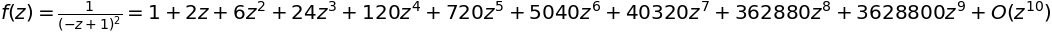

In [19]:
define(f(z), (1/(1-z))*(1/(1-z)), ctor=FEq).series(z, n=10, kernel='exponential')

In [20]:
define(f(z), exp(z)**2, ctor=FEq).series(z, n=10, kernel='exponential')

# Linear types

In [21]:
tyvar(x).gf()

In [22]:
(tyvar(u[0]) * tyvar(u[1]) * tyvar(u[2])).gf()

In [23]:
(tyvar(o[0]) * tyvar(o[1]) * tyvar(o[2])).gf()

In [24]:
(tyvar(u[0]) | tyvar(u[1]) | tyvar(u[2])).gf()

In [20]:
(tyvar(o[0]) | tyvar(o[1]) | tyvar(o[2])).gf()

In [6]:
truth, falsehood = tyvar(w[1]*z), tyvar(w[0]*z)

In [7]:
boolean = truth | falsehood

In [8]:
boolean.gf()

In [9]:
maybe(tyvar(alpha*z)).gf()

# occupancies

In [10]:
occ_prb, = cp(maybe(tyvar(u[i]*z)) for i in range(4)).gf()
occ_prb

In [11]:
occupancy(occ_prb, syms=[u[i] for i in range(4)], objects='unlike', boxes='unlike').series(z)

In [27]:
occupancy(occ_prb, syms=[u[i] for i in range(4)], objects='unlike', boxes='like').series(z)

In [28]:
occupancy(occ_prb, syms=[u[i] for i in range(4)], objects='like', boxes='unlike').series(z)

In [29]:
occupancy(occ_prb, syms=[u[i] for i in range(4)], objects='like', boxes='like').series(z)

---

In [67]:
occupancy_problem, = cp(maybe(du(tyvar((u[i]*z)**(j+1)) for j in range(i+1))) 
                        for i in range(3)).gf()
occupancy_problem

In [68]:
occupancy(occupancy_problem, syms=[u[i] for i in range(3)], objects='unlike', boxes='unlike').series(z)

In [36]:
occupancy(occupancy_problem, syms=[u[i] for i in range(3)], objects='unlike', boxes='like').series(z)

In [37]:
occupancy(occupancy_problem, syms=[u[i] for i in range(3)], objects='like', boxes='unlike').series(z)

In [38]:
occupancy(occupancy_problem, syms=[u[i] for i in range(3)], objects='like', boxes='like').series(z)

In [39]:
((1+t)*(1+t+t**2)*(1+t+t**2+t**3)).series(t,n=10) # just for checking

---

In [40]:
def sums_of_powers(boxes, base):
    p = IndexedBase('\space')
    return cp(cp() | tyvar(p[j]*z**(base**i)) 
              for i in range(0,boxes) 
              for j in [Pow(base,i,evaluate=False)] # implicit let
             ).gf()

In [41]:
occupancy, = sums_of_powers(boxes=4, base=2)
occupancy.series(z, n=32)

                                                                              
\times(\space[2**2], \space[2**3], \space[2**0], \space[2**1], z) = (z⋅\space[

           ⎛ 2                 ⎞ ⎛ 4                 ⎞ ⎛ 8                 ⎞  
2**0] + 1)⋅⎝z ⋅\space[2**1] + 1⎠⋅⎝z ⋅\space[2**2] + 1⎠⋅⎝z ⋅\space[2**3] + 1⎠ =

  15                                                        14                
 z  ⋅\space[2**0]⋅\space[2**1]⋅\space[2**2]⋅\space[2**3] + z  ⋅\space[2**1]⋅\s

                           13                                           12    
pace[2**2]⋅\space[2**3] + z  ⋅\space[2**0]⋅\space[2**2]⋅\space[2**3] + z  ⋅\sp

                          11                                           10     
ace[2**2]⋅\space[2**3] + z  ⋅\space[2**0]⋅\space[2**1]⋅\space[2**3] + z  ⋅\spa

                         9                              8                 7   
ce[2**1]⋅\space[2**3] + z ⋅\space[2**0]⋅\space[2**3] + z ⋅\space[2**3] + z ⋅\s

                                        6     

In [40]:
occupancy, = sums_of_powers(boxes=4, base=3)
occupancy.series(z, n=100)

                                                                              
\times(\space[3**0], z, \space[3**3], \space[3**2], \space[3**1]) = (z⋅\space[

           ⎛ 3                 ⎞ ⎛ 9                 ⎞ ⎛ 27                 ⎞ 
3**0] + 1)⋅⎝z ⋅\space[3**1] + 1⎠⋅⎝z ⋅\space[3**2] + 1⎠⋅⎝z  ⋅\space[3**3] + 1⎠ 

   40                                                        39               
= z  ⋅\space[3**0]⋅\space[3**1]⋅\space[3**2]⋅\space[3**3] + z  ⋅\space[3**1]⋅\

                            37                                           36   
space[3**2]⋅\space[3**3] + z  ⋅\space[3**0]⋅\space[3**2]⋅\space[3**3] + z  ⋅\s

                           31                                           30    
pace[3**2]⋅\space[3**3] + z  ⋅\space[3**0]⋅\space[3**1]⋅\space[3**3] + z  ⋅\sp

                          28                              27                 1
ace[3**1]⋅\space[3**3] + z  ⋅\space[3**0]⋅\space[3**3] + z  ⋅\space[3**3] + z 

3                                           12

In [41]:
occupancy, = sums_of_powers(boxes=4, base=5)
occupancy.series(z, n=200)

                                                                              
\times(\space[5**1], \space[5**0], \space[5**3], z, \space[5**2]) = (z⋅\space[

           ⎛ 5                 ⎞ ⎛ 25                 ⎞ ⎛ 125                 
5**0] + 1)⋅⎝z ⋅\space[5**1] + 1⎠⋅⎝z  ⋅\space[5**2] + 1⎠⋅⎝z   ⋅\space[5**3] + 1

⎞    156                                                        155           
⎠ = z   ⋅\space[5**0]⋅\space[5**1]⋅\space[5**2]⋅\space[5**3] + z   ⋅\space[5**

                                151                                           
1]⋅\space[5**2]⋅\space[5**3] + z   ⋅\space[5**0]⋅\space[5**2]⋅\space[5**3] + z

150                              131                                          
   ⋅\space[5**2]⋅\space[5**3] + z   ⋅\space[5**0]⋅\space[5**1]⋅\space[5**3] + 

 130                              126                              125        
z   ⋅\space[5**1]⋅\space[5**3] + z   ⋅\space[5**0]⋅\space[5**3] + z   ⋅\space[

         31                                   

In [46]:
occupancy, = sums_of_powers(boxes=4, base=7)
occupancy.series(z, n=500)

                                                                              
\times(\space[7**3], \space[7**2], z, \space[7**1], \space[7**0]) = (z⋅\space[

           ⎛ 7                 ⎞ ⎛ 49                 ⎞ ⎛ 343                 
7**0] + 1)⋅⎝z ⋅\space[7**1] + 1⎠⋅⎝z  ⋅\space[7**2] + 1⎠⋅⎝z   ⋅\space[7**3] + 1

⎞    400                                                        399           
⎠ = z   ⋅\space[7**0]⋅\space[7**1]⋅\space[7**2]⋅\space[7**3] + z   ⋅\space[7**

                                393                                           
1]⋅\space[7**2]⋅\space[7**3] + z   ⋅\space[7**0]⋅\space[7**2]⋅\space[7**3] + z

392                              351                                          
   ⋅\space[7**2]⋅\space[7**3] + z   ⋅\space[7**0]⋅\space[7**1]⋅\space[7**3] + 

 350                              344                              343        
z   ⋅\space[7**1]⋅\space[7**3] + z   ⋅\space[7**0]⋅\space[7**3] + z   ⋅\space[

         57                                   

In [48]:
assert 393 == 7**0 + 7**2 + 7**3 # _.rhs.rhs.coeff(z, 393)

# lists

In [12]:
lst_of_alpha_gf, = lst(tyvar(alpha*z)).gf()
lst_of_alpha_gf

In [13]:
occupancy(lst_of_alpha_gf, syms=[alpha], objects='unlike', boxes='unlike').series(z)

In [59]:
occupancy(lst_of_alpha_gf, syms=[alpha], objects='unlike', boxes='like').series(z)

In [60]:
occupancy(lst_of_alpha_gf, syms=[alpha], objects='like', boxes='unlike').series(z)

In [61]:
occupancy(lst_of_alpha_gf, syms=[alpha], objects='like', boxes='like').series(z)

---

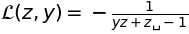

In [69]:
lst_of_maybe_of_alpha_gf, = lst(maybe(tyvar(y)) * tyvar(z)).gf()
lst_of_maybe_of_alpha_gf

In [72]:
occupancy(lst_of_maybe_of_alpha_gf, syms=[y], objects='unlike', boxes='unlike').series(z, n=5)

In [73]:
occupancy(lst_of_maybe_of_alpha_gf, syms=[y], objects='unlike', boxes='like').series(z, n=5)

In [74]:
occupancy(lst_of_maybe_of_alpha_gf, syms=[y], objects='like', boxes='unlike').series(z, n=5)

In [75]:
occupancy(lst_of_maybe_of_alpha_gf, syms=[y], objects='like', boxes='like').series(z,n=5)

---

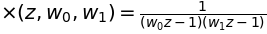

In [85]:
nats = (lst(truth) * lst(falsehood))
nats_gf, = nats.gf()
nats_gf

In [86]:
occupancy(nats_gf, syms=[w[1],w[0]], objects='unlike', boxes='unlike').series(z)

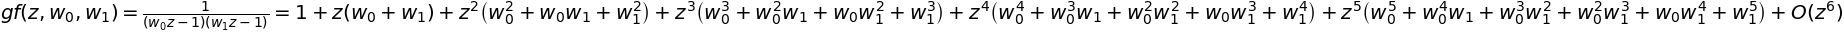

In [87]:
occupancy(nats_gf, syms=[w[1],w[0]], objects='unlike', boxes='like').series(z)

In [84]:
occupancy(nats_gf, syms=[w[1],w[0]], objects='like', boxes='unlike').series(z)

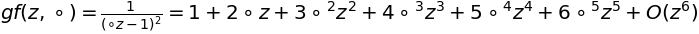

In [80]:
occupancy(nats_gf, syms=[w[1],w[0]], objects='like', boxes='like').series(z)

---

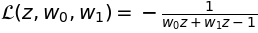

In [88]:
lst_of_boolean_gf, = lst(boolean).gf()
lst_of_boolean_gf

In [90]:
occupancy(lst_of_boolean_gf, syms=[w[1],w[0]], objects='unlike', boxes='unlike').series(z, n=5)

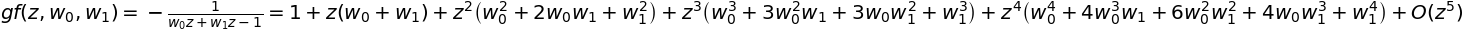

In [91]:
occupancy(lst_of_boolean_gf, syms=[w[1],w[0]], objects='unlike', boxes='like').series(z, n=5)

In [93]:
occupancy(lst_of_boolean_gf, syms=[w[1],w[0]], objects='like', boxes='unlike').series(z, n=5)

In [94]:
occupancy(lst_of_boolean_gf, syms=[w[1],w[0]], objects='like', boxes='like').series(z, n=5)

---

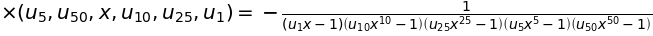

In [83]:
dollar_exchange, = (lst(tyvar(u[1]*x)) * lst(tyvar(u[5]*x**5)) * lst(tyvar(u[10]*x**10)) * 
                    lst(tyvar(u[25]*x**25)) * lst(tyvar(u[50]*x**50))).gf()
dollar_exchange

In [84]:
coins = dollar_exchange.series(x, n=101)

In [85]:
coins.rhs.rhs.coeff(x,42)

In [87]:
assert 292 == coins.rhs.rhs.coeff(x,100).subs( # number of ways to change *one* dollar
    {u[1]:1, u[5]:1, u[10]:1, u[25]:1, u[50]:1})

# Differences

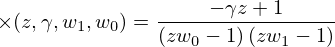

In [119]:
difference = (cp() | tyvar(-gamma*z))
ones = nats * difference
ones_gf, = ones.gf()
ones_gf

In [121]:
ones_gf(z,1,1,1).series(z, n=10) # check!

In [123]:
one_gf, = (ones * difference).gf()
one_gf.series(z, n=10).rhs.rhs.subs({w[0]:1, w[1]:1, gamma:1})

# Non-empty lists

In [70]:
nnlst_of_alpha_gf, = nnlst(tyvar(alpha*z)).gf()
nnlst_of_alpha_gf

In [71]:
nnlst_of_alpha_gf.series(z, n=10)

In [72]:
nnlst_gf, = nnlst(nnlst(truth)*tyvar(w[0])).gf()

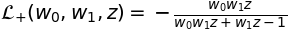

In [73]:
nnlst_gf

In [75]:
occupancy(nnlst_gf, syms=[w[1],w[0]], objects='unlike', boxes='unlike').series(z, n=5)

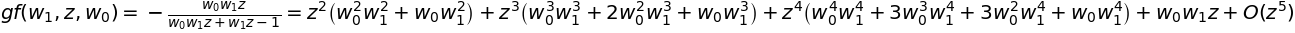

In [80]:
occupancy(nnlst_gf, syms=[w[1],w[0]], objects='unlike', boxes='like').series(z, n=5)

---

# Trees

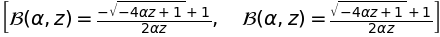

In [97]:
bin_tree_gfs = bin_tree(tyvar(alpha*z)).gf()
bin_tree_gfs

In [98]:
bin_tree_gf = bin_tree_gfs[0]

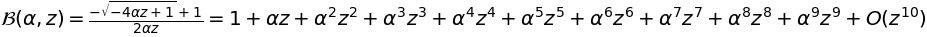

In [99]:
bin_tree_gf.series(z, n=10,kernel='catalan')

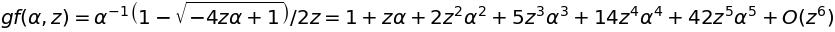

In [100]:
occupancy(bin_tree_gf, syms=[alpha], objects='unlike', boxes='unlike').series(z)

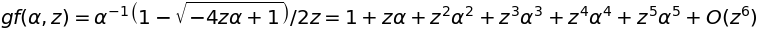

In [101]:
occupancy(bin_tree_gf, syms=[alpha], objects='unlike', boxes='unlike').series(z, kernel='catalan')

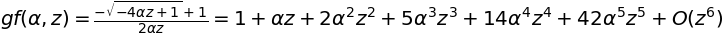

In [102]:
occupancy(bin_tree_gf, syms=[alpha], objects='unlike', boxes='like').series(z)

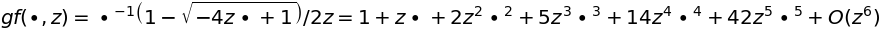

In [103]:
occupancy(bin_tree_gf, syms=[alpha], objects='like', boxes='unlike').series(z)

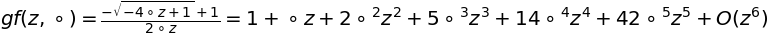

In [104]:
occupancy(bin_tree_gf, syms=[alpha], objects='like', boxes='like').series(z)

---

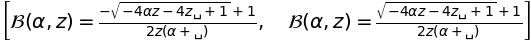

In [123]:
bin_tree_of_boolean_gfs = bin_tree(maybe(tyvar(alpha)) * tyvar(z)).gf()
bin_tree_of_boolean_gfs

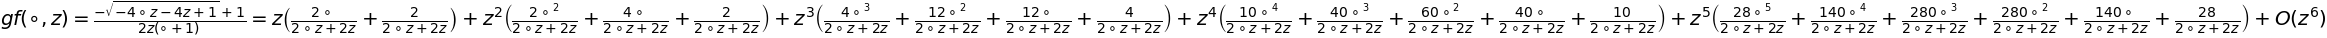

In [146]:
occupancy(bin_tree_of_boolean_gf, syms=[alpha], objects='like', boxes='like').series(z,n=6, kernel='ordinary')

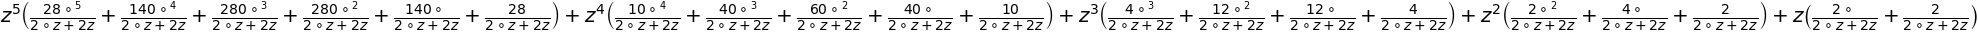

In [147]:
_.rhs.rhs.removeO()

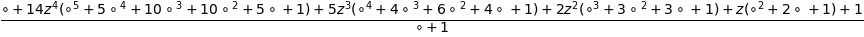

In [148]:
_.simplify()

In [149]:
_.ratsimp().collect(z).simplify()

---

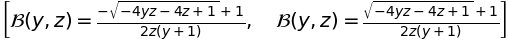

In [31]:
bin_tree_of_boolean_gfs = bin_tree((cp() | tyvar(y))*tyvar(z)).gf()
bin_tree_of_boolean_gfs

In [35]:
bin_tree_of_boolean_gf = bin_tree_of_boolean_gfs[0]

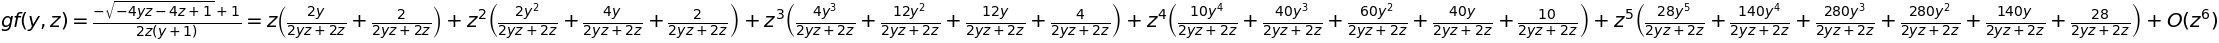

In [36]:
occupancy(bin_tree_of_boolean_gf, syms=[w[1],w[0],y], objects='unlike', boxes='like').series(z,n=6, kernel='ordinary')

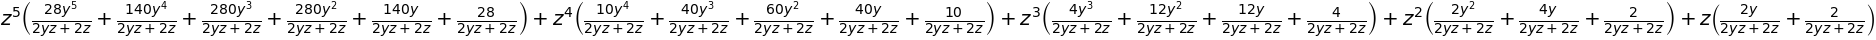

In [37]:
_.rhs.rhs.removeO()

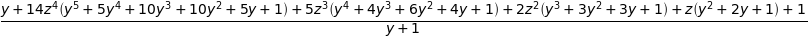

In [38]:
_.simplify()

In [39]:
_.ratsimp().collect(z).simplify()

In [93]:
l = IndexedBase('l')
def linear_comb_of_powers(boxes, base):
    return cp(lst(tyvar(Mul(l[j], z**(base**i), evaluate=False)))
              for i in range(boxes) 
              for j in [Pow(base,i,evaluate=False)]).gf()

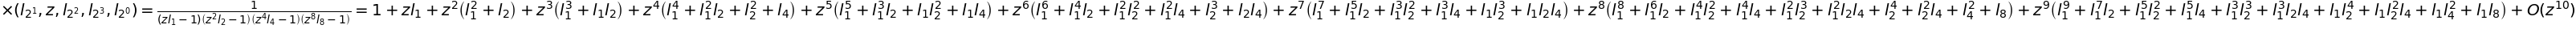

In [101]:
occupancy, = linear_comb_of_powers(boxes=4, base=Integer(2))
occupancy.series(z, n=10)

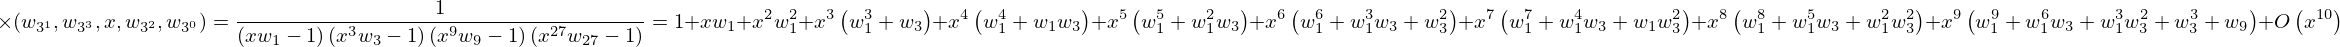

In [374]:
occupancy, = linear_comb_of_powers(boxes=4, base=3)
occupancy.series(x, n=10)

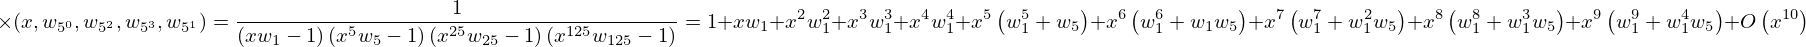

In [375]:
occupancy, = linear_comb_of_powers(boxes=4, base=5)
occupancy.series(x, n=10)

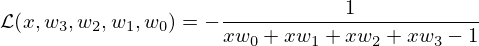

In [349]:
occupancy, = lst(tyvar(w[0]*x) | tyvar(w[1]*x) | tyvar(w[2]*x) | tyvar(w[3]*x)).gf()
occupancy

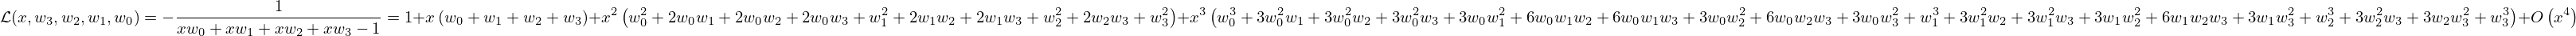

In [191]:
occupancy.series(x, n=4)

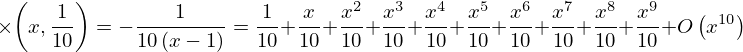

In [399]:
def uniform_rv(n):
    return tyvar(S(1)/nel) * lst(tyvar(x))
occupancy, = uniform_rv(n=10).gf()
occupancy.series(x,n=10)

In [394]:
class lst_structure_w(rec):
         
    def definition(self, alpha):
        me = self.me()
        return alpha | lst(me)
    
    def label(self):
        return r'\mathcal{L}_{w}' # `_s` stands for "structure"

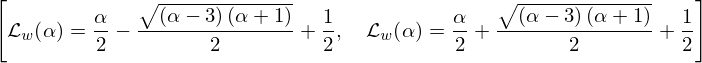

In [193]:
lst_structure_w(tyvar(alpha)).gf()

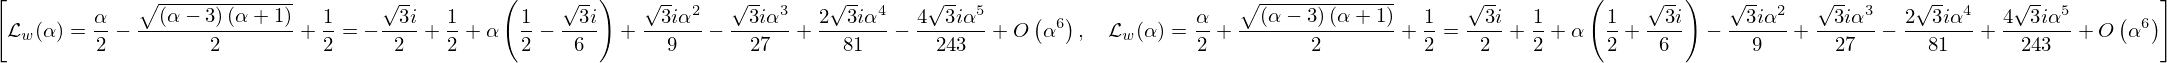

In [194]:
[gf.series(alpha) for gf in _]

In [195]:
class lst_structure(rec):
         
    def definition(self, alpha):
        me = self.me()
        return alpha | (lst(me) * me * me)
    
    def label(self):
        return r'\mathcal{L}_{s}' # `_s` stands for "structure"

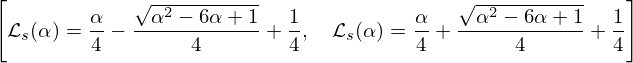

In [197]:
lst_structure(tyvar(alpha)).gf()

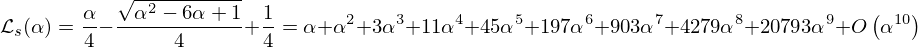

In [198]:
_[0].series(alpha, n=10)

In [199]:
class nnlst_structure(rec):
         
    def definition(self, alpha):
        me = self.me()
        return alpha * lst(nnlst(me))
    
    def label(self):
        return r'\mathcal{L}_{s}^{+}' # `_s` stands for "structure"

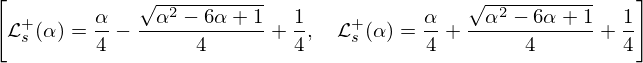

In [201]:
nnlst_structure(tyvar(alpha)).gf()

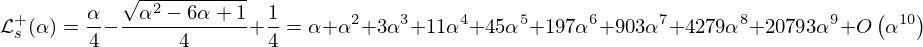

In [202]:
_[0].series(alpha, n=10)

In [203]:
class tree(rec):
         
    def definition(self, alpha):
        return alpha * lst(self.me())
    
    def label(self):
        return r'\mathcal{T}'

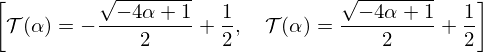

In [204]:
tree(tyvar(alpha)).gf()

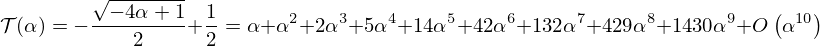

In [205]:
_[0].series(alpha, n=10)

In [206]:
class combination(rec):
         
    def definition(self, alpha):
        me = self.me()
        return alpha | (me * me)
    
    def label(self):
        return r'\mathcal{C}'

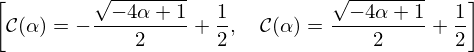

In [209]:
combination(tyvar(alpha)).gf()

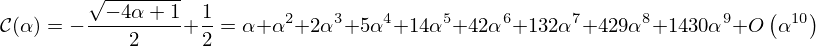

In [210]:
_[0].series(alpha, n=10)

In [211]:
class ab_tree(rec):
         
    def definition(self, alpha, beta):
        me = self.me()
        return beta | (alpha * me * me)
    
    def label(self):
        return r'\mathcal{T}_{a,b}'

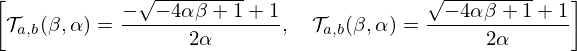

In [212]:
ab_tree_gfs = ab_tree(tyvar(alpha), tyvar(beta)).gf()
ab_tree_gfs

In [213]:
ab_tree_gf = ab_tree_gfs[0]

In [214]:
fab_eq = FEq(ab_tree_gf.lhs, ab_tree_gf.rhs.series(beta, n=20).removeO(), evaluate=False)
fab_eq

In [215]:
fab_eq(x,x)

In [216]:
(_*alpha).expand()

In [217]:
#with lift_to_Lambda(fab_eq) as F:
B = fab_eq(x,1)
A = fab_eq(1,x)
A,B,

In [218]:
(A+B).expand()

In [219]:
((1+x)*A).expand()

In [223]:
class dyck(rec):
         
    def definition(self, alpha, beta):
        me = self.me()
        return cp() | (alpha * me * beta * me)
    
    def label(self):
        return r'\mathcal{D}'

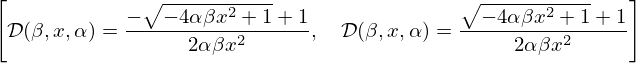

In [225]:
dyck_gfs = dyck(tyvar(alpha*x), tyvar(beta*x)).gf()
dyck_gfs

In [226]:
dyck_gf = dyck_gfs[0]

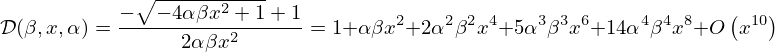

In [229]:
dyck_gf.series(x,n=10)

In [233]:
class motzkin(rec):
         
    def definition(self, alpha, beta, gamma):
        me = self.me()
        return cp() | (alpha * me * beta * me) | (gamma * me)
    
    def label(self):
        return r'\mathcal{M}'

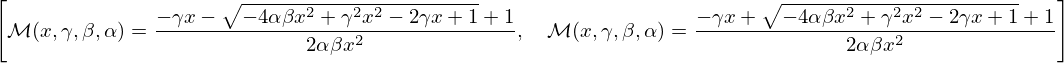

In [235]:
motzkin_gfs = motzkin(tyvar(alpha*x), tyvar(beta*x), tyvar(gamma*x),).gf()
motzkin_gfs

In [236]:
motzkin_gf = motzkin_gfs[0]

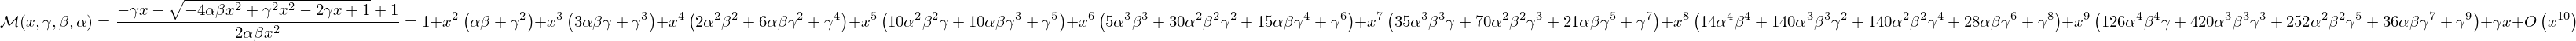

In [237]:
motzkin_gf.series(x,n=10)

In [238]:
motzkin_gf(x,1,1,1).series(x,n=10)

In [294]:
class motzkin_p(rec):
         
    def definition(self, alpha, beta, gamma, eta):
        me = self.me()
        return cp() | (alpha * me * beta * me) | (gamma * me) | (eta * me)
    
    def label(self):
        return r'\mathcal{M}^{+}'

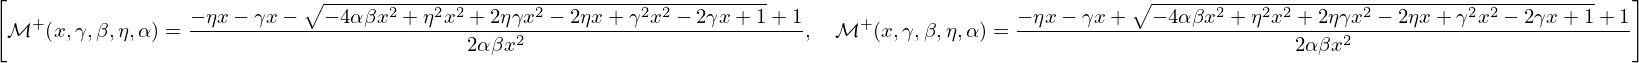

In [295]:
motzkinp_gfs = motzkin_p(tyvar(alpha*x), tyvar(beta*x), tyvar(gamma*x), tyvar(eta*x),).gf()
motzkinp_gfs

In [298]:
motzkinp_gf = motzkinp_gfs[0]

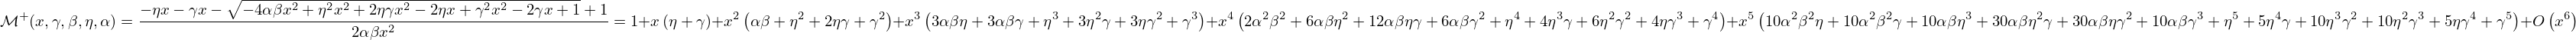

In [300]:
motzkinp_gf.series(x,n=6)

In [301]:
motzkinp_gf(x,1,1,1,1).series(x,n=10)

In [245]:
class fibo(rec):
         
    def definition(self, alpha, beta):
        me = self.me()
        return cp() | alpha | ((beta | (alpha * beta)) * me)
    
    def label(self):
        return r'\mathcal{F}'

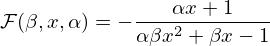

In [248]:
fibo_gf, = fibo(tyvar(alpha*x), tyvar(beta*x),).gf()
fibo_gf

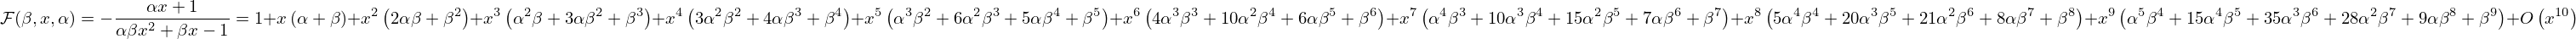

In [249]:
fibo_gf.series(x,n=10)

In [250]:
fibo_gf(1,x,1).series(x,n=10)

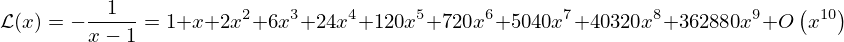

In [512]:
lst_of_truth_gf, = lst(tyvar(x)).gf()
lst_of_truth_gf.series(x, n=10, is_exp=True)

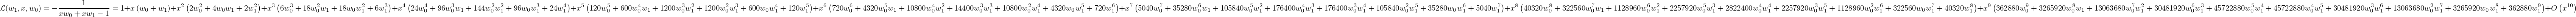

In [520]:
lst_of_boolean_gf.series(x,n=10,is_exp=True)

In [515]:
_.rhs.rhs.subs({w[0]:1,w[1]:1})

In [521]:
sum((_.rhs.rhs.coeff(x,i)/factorial(i))*x**i for i in range(1,10))

In [17]:
class powerset(ty):
        
    def gf_rhs(self, ty):
        return [exp(self.mulfactor() * gf.rhs) for gf in ty.gf()]
    
    def mulfactor(self):
        return 1
    
    def label(self):
        return r'\mathcal{P}'

In [478]:
powerset_of_tyvar_gf, = (2**(nnlst(tyvar(alpha)))).gf()
powerset_of_tyvar_gf

In [479]:
powerset_of_tyvar_gf.series(alpha, n=10, is_exp=True)

In [480]:
powerset_of_tyvar_gf, = (2**(nnlst(boolean))).gf()
powerset_of_tyvar_gf

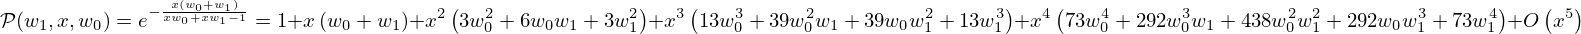

In [481]:
powerset_of_tyvar_gf.series(x, n=5, is_exp=True)

In [421]:
_.rhs.rhs.subs({w[0]:1,w[1]:1})

In [273]:
powerset_of_tyvar_gf, _ = (2**(bin_tree(tyvar(alpha)))).gf()
powerset_of_tyvar_gf

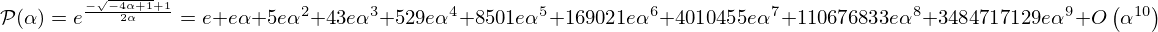

In [274]:
powerset_of_tyvar_gf.series(alpha, n=10, is_exp=True)

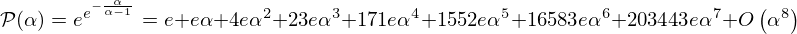

In [288]:
l, = (2**(2**(nnlst(tyvar(alpha))))).gf()
define(l.lhs, l.rhs.ratsimp(), ctor=FEq).series(alpha,n=8,is_exp=True)

In [494]:
class cycle(ty):
         
    def gf_rhs(self, ty):
        return [log(gf.rhs) for gf in ty.gf()]
    
    def label(self):
        return r'\mathcal{C}'

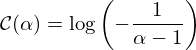

In [501]:
cycle_of_tyvar_gf, = (~(lst(tyvar(alpha)))).gf()
cycle_of_tyvar_gf

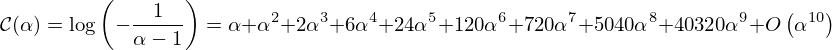

In [502]:
cycle_of_tyvar_gf.series(alpha, n=10, is_exp=True)

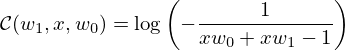

In [506]:
cycle_of_tyvar_gf, = (~(lst(boolean))).gf()
cycle_of_tyvar_gf

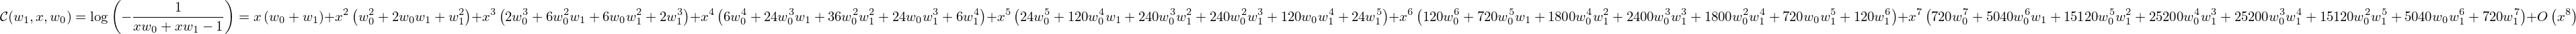

In [507]:
cycle_of_tyvar_gf.series(x, n=8, is_exp=True)

In [508]:
_.rhs.rhs.subs({w[0]:1,w[1]:1})

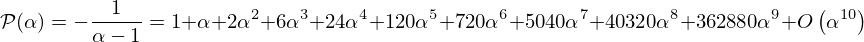

In [524]:
Pstar_gf, = (2**(~(lst(tyvar(alpha))))).gf()
Pstar_gf.series(alpha, n=10, is_exp=True)

In [542]:
class ipowerset(powerset):
    
    def mulfactor(self):
        return -1

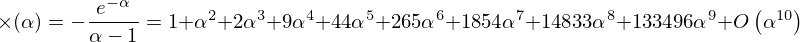

In [545]:
derangements_gf, = ((-2)**tyvar(alpha)).gf()
derangements_gf.series(alpha, n=10, is_exp=True)

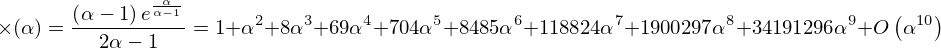

In [549]:
derangements_gf, = ((-2)**nnlst(tyvar(alpha))).gf()
derangements_gf.series(alpha, n=10, is_exp=True)

In [38]:
[1,2][1:]

In [45]:
def foldr(f, l, i):
    if not l:
        return i
    else:
        car, *cdr = l
        return f(car, foldr(f, cdr, i))
    
class arrow(ty):
    
    def label(self):
        return r'\rightarrow'
        
    def gf_rhs(self, alpha, beta):
        v = Dummy()
        return [foldr(lambda gf, acc: Lambda([x], acc(gf.rhs)), 
                      gfs[:-1], 
                      Lambda([x], gfs[-1].rhs))(x)
                for gfs in self.gfs_space()]
        return [foldr(lambda gf, acc: acc**gf.rhs, gfs[:-1], gfs[-1].rhs)
                for gfs in self.gfs_space()]

In [46]:
arr, = arrow(boolean, boolean).gf()
arr

In [49]:
arr.series(x,n=5,is_exp=False)

In [50]:
_.rhs.rhs.removeO().subs({w[0]:1,w[1]:1})

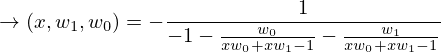

In [51]:
arr, = arrow(lst(boolean), lst(boolean)).gf()
arr

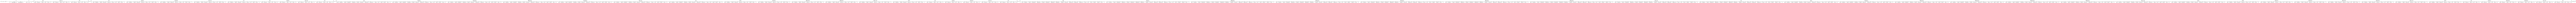

In [56]:
arr.series(x,n=5,is_exp=False)

In [57]:
_.rhs.rhs.removeO().subs({w[0]:1,w[1]:1})

---

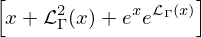

In [293]:
lamda_gf = lamda(tyvar(x)).gf_rhs(tyvar(x))
lamda_gf

In [112]:
lamda_gf.rhs.series(x,n=10)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.